In [59]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
# Reshape data to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
 model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 42s 27ms/step - loss: 0.8882 - accuracy: 0.7518 - val_loss: 0.4223 - val_accuracy: 0.8441
Epoch 2/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.4778 - accuracy: 0.8270 - val_loss: 0.3766 - val_accuracy: 0.8615
Epoch 3/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.4127 - accuracy: 0.8495 - val_loss: 0.3430 - val_accuracy: 0.8737
Epoch 4/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3774 - accuracy: 0.8619 - val_loss: 0.3347 - val_accuracy: 0.8730
Epoch 5/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3531 - accuracy: 0.8699 - val_loss: 0.3221 - val_accuracy: 0.8813
Epoch 6/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3392 - accuracy: 0.8749 - val_loss: 0.3332 - val_accuracy: 0.8782
Epoch 7/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3260 - accuracy: 0.8782 - val_loss: 0.3084 -

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


313/313 [==============================] - 2s 7ms/step - loss: 0.3447 - accuracy: 0.8847
Test accuracy: 0.8847000002861023


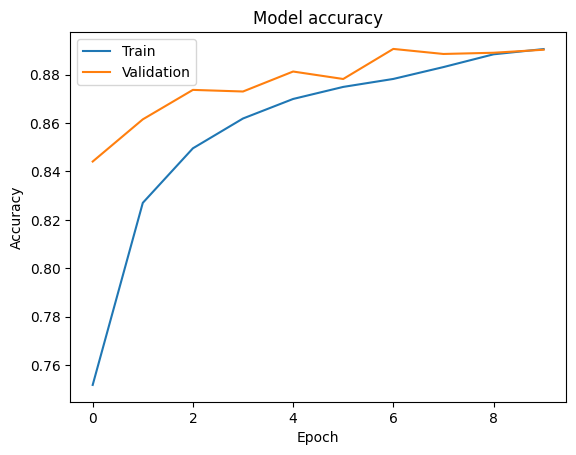

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [58]:
class_names = ['T-shirt/top','Trouser', 'Pullover','Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


313/313 [==============================] - 2s 7ms/step


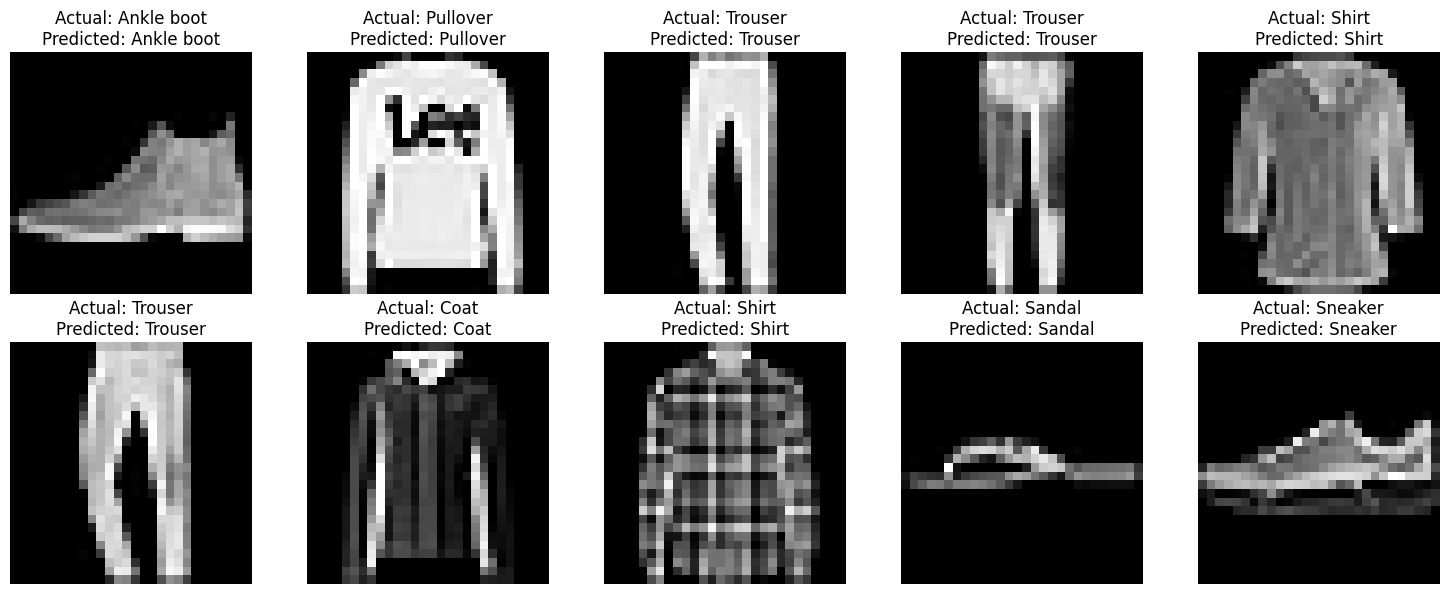

In [57]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
y_test_integer = np.argmax(y_test, axis=1)
actual_labels = [class_names[label] for label in y_test_integer]
predicted_labels = [class_names[label] for label in predicted_classes]
num_images_to_show = 10

plt.figure(figsize=(15, 6))
for i in range(num_images_to_show):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()